In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
import pandas as pd

# Load all three datasets
df1 = pd.read_csv('Test_Scaled_Cont_Int.csv')
df2 = pd.read_csv('Valid_Scaled_Cont_Int.csv')
df3 = pd.read_csv('Train_Scaled_Cont_Int.csv')

# Concatenate them
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the result
combined_df.to_csv('combined_dataset.csv', index=False)
X = combined_df.drop('LoanApproved', axis=1)
y = combined_df['LoanApproved']

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

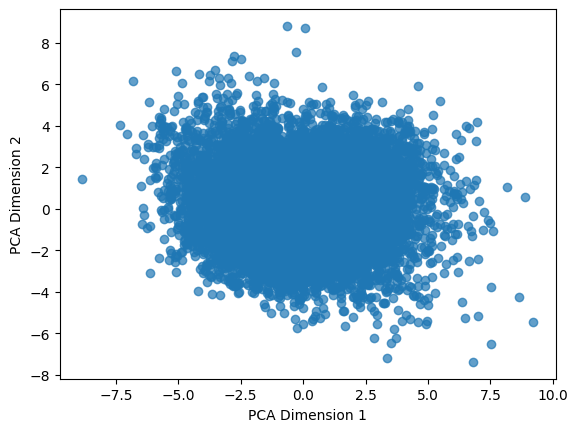

In [4]:
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.7)
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()

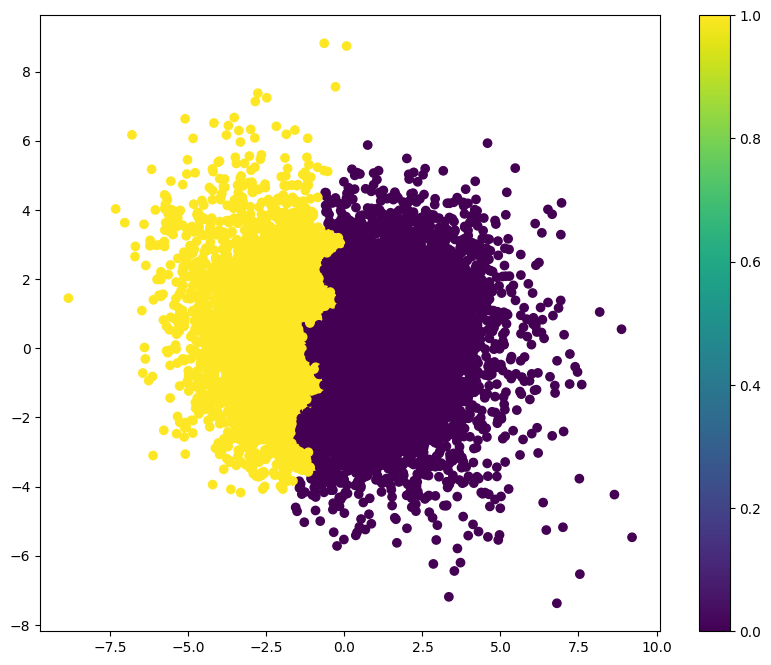

In [5]:
clusterting = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(X_pca)
labels = clusterting.labels_
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1], c=labels)
plt.colorbar()
plt.show()

In [6]:
def purity(cluster_labels, true_labels, k):
    correct=0
    totals=0
    for cluster in range(k):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        true_digits = true_labels[cluster_indices]
        most_common = Counter(true_digits).most_common(1)[0]
        total = len(cluster_indices)
        correct+=most_common[1]
        totals+=total
        print(f"Cluster {cluster}: Most frequent digit = {most_common[0]} "
        f"({most_common[1]}/{total} = {most_common[1]/total:.2%} purity)")
    print(f"Total purity score = ({correct}/{totals} = {correct/totals:.2%} purity)")

In [7]:
purity(labels,y,2)

Cluster 0: Most frequent digit = 0 (13357/14051 = 95.06% purity)
Cluster 1: Most frequent digit = 1 (4086/5949 = 68.68% purity)
Total purity score = (17443/20000 = 87.22% purity)


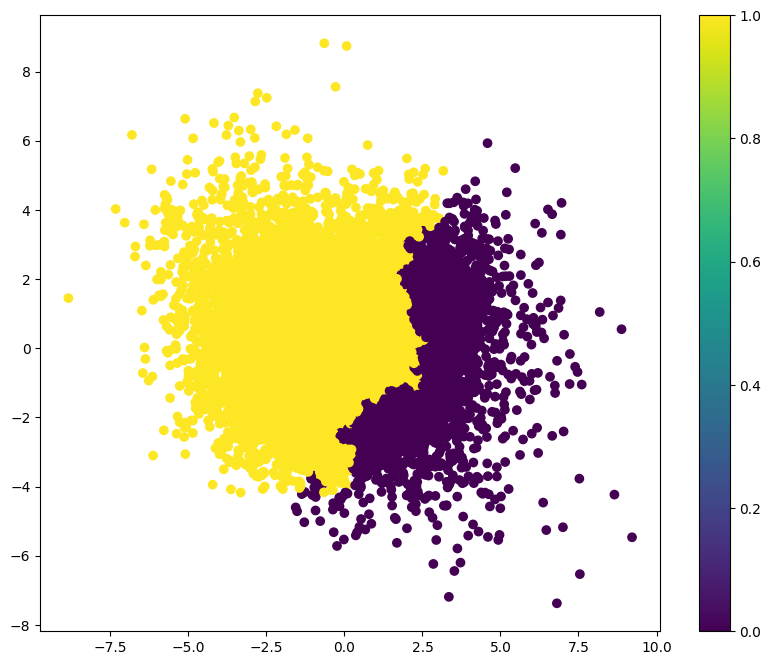

In [8]:
clusterting = AgglomerativeClustering(n_clusters=2,linkage='complete').fit(X_pca)
c_labels = clusterting.labels_
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1], c=c_labels)
plt.colorbar()
plt.show()

In [9]:
purity(c_labels,y,2)

Cluster 0: Most frequent digit = 0 (3463/3463 = 100.00% purity)
Cluster 1: Most frequent digit = 0 (11757/16537 = 71.10% purity)
Total purity score = (15220/20000 = 76.10% purity)


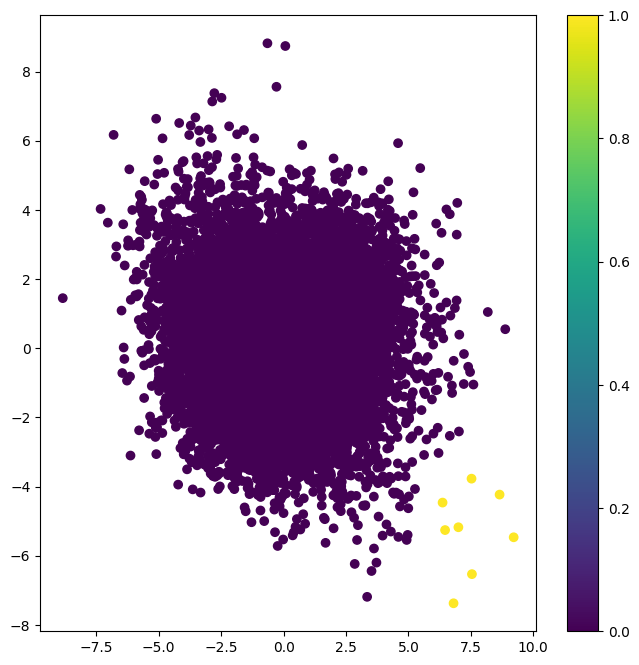

In [10]:
clusterting = AgglomerativeClustering(n_clusters=2,linkage='average').fit(X_pca)
a_labels = clusterting.labels_
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1], c=a_labels)
plt.colorbar()
plt.show()

In [11]:
purity(a_labels,y,2)

Cluster 0: Most frequent digit = 0 (15212/19992 = 76.09% purity)
Cluster 1: Most frequent digit = 0 (8/8 = 100.00% purity)
Total purity score = (15220/20000 = 76.10% purity)


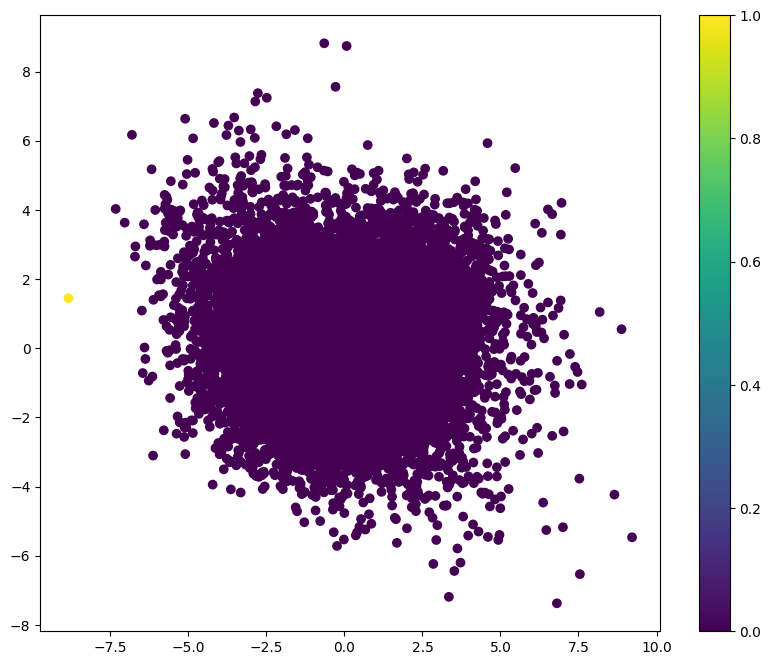

In [32]:
clusterting = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_pca)
s_labels = clusterting.labels_
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1], c=s_labels)
plt.colorbar()
plt.show()

In [33]:
purity(s_labels,y,2)

Cluster 0: Most frequent digit = 0 (15220/19999 = 76.10% purity)
Cluster 1: Most frequent digit = 1 (1/1 = 100.00% purity)
Total purity score = (15221/20000 = 76.11% purity)


In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Silhouette Score
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score for ward linkage: {score:.3f}")
score = silhouette_score(X_pca, c_labels)
print(f"Silhouette Score for complete linkage: {score:.3f}")
score = silhouette_score(X_pca, s_labels)
print(f"Silhouette Score for single linkage: {score:.3f}")
score = silhouette_score(X_pca, a_labels)
print(f"Silhouette Score for average linkage: {score:.3f}")



Silhouette Score for ward linkage: 0.337
Silhouette Score for complete linkage: 0.294
Silhouette Score for single linkage: 0.641
Silhouette Score for average linkage: 0.660


Purity Score: 0.872


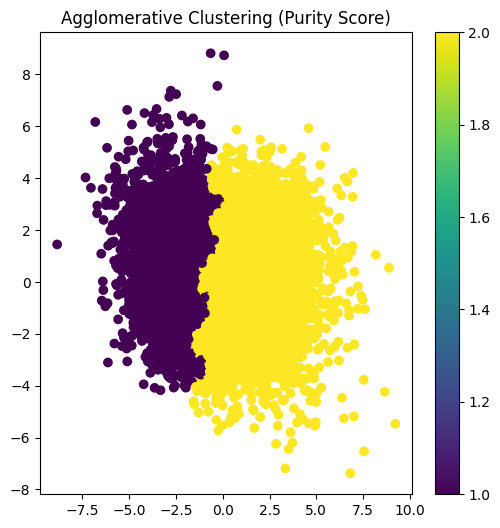

In [14]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Z = linkage(X_pca, method='ward')
labels = fcluster(Z, t=2, criterion='maxclust')


def purity_score(y, y_pred):
   
    cm = confusion_matrix(y, y_pred)
    
    
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm)


purity = purity_score(y, labels)
print(f"Purity Score: {purity:.3f}")


plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.colorbar()
plt.title("Agglomerative Clustering (Purity Score)")
plt.show()


Purity Score: 1.000


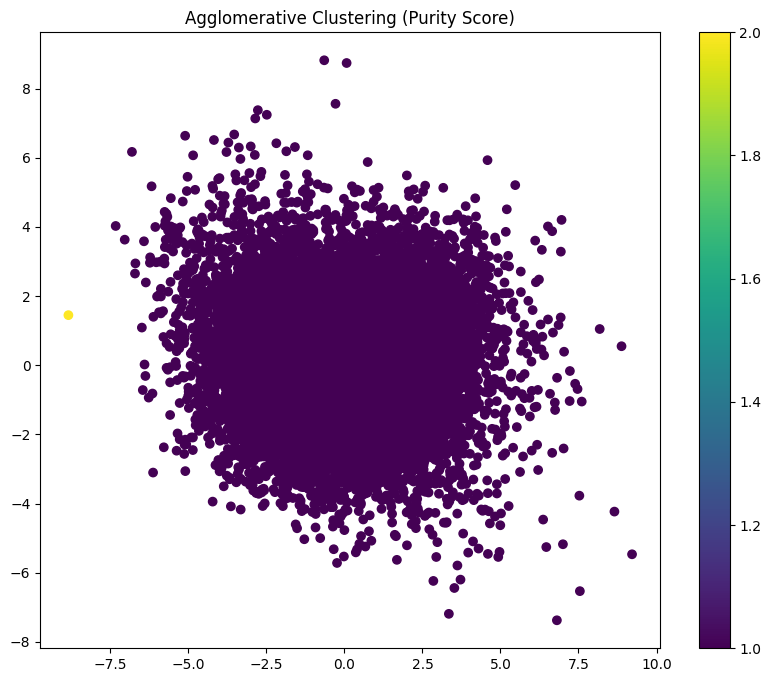

In [44]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Z = linkage(X_pca, method='single')
labels = fcluster(Z, t=2, criterion='maxclust')


def purity_score(y, y_pred):
   
    cm = confusion_matrix(y, y_pred)
    
    
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm)


purity = purity_score(y, labels)
print(f"Purity Score: {purity:.3f}")


plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.colorbar()
plt.title("Agglomerative Clustering (Purity Score)")
plt.show()


Purity Score: 0.827


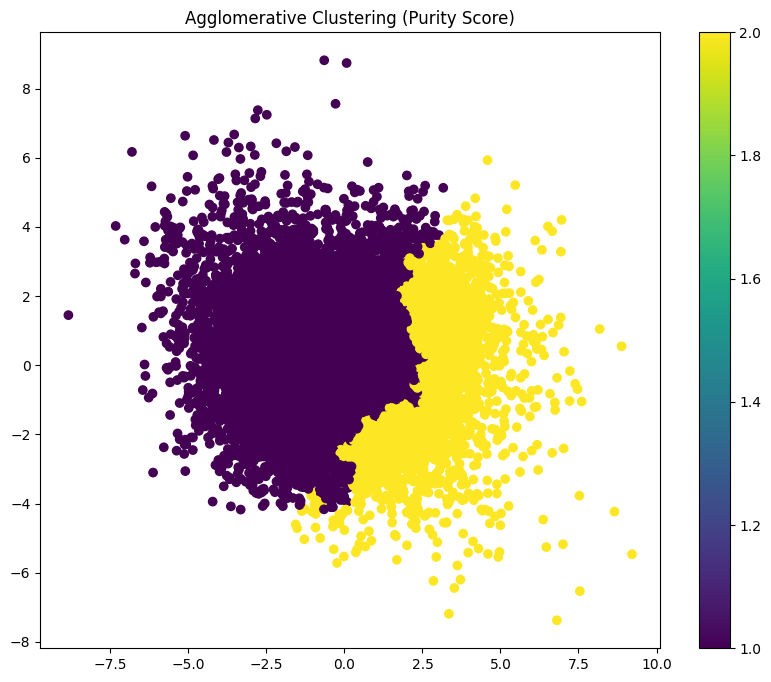

In [46]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Z = linkage(X_pca, method='complete')
labels = fcluster(Z, t=2, criterion='maxclust')


def purity_score(y, y_pred):
   
    cm = confusion_matrix(y, y_pred)
    
    
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm)


purity = purity_score(y, labels)
print(f"Purity Score: {purity:.3f}")


plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.colorbar()
plt.title("Agglomerative Clustering (Purity Score)")
plt.show()


Purity Score: 1.000


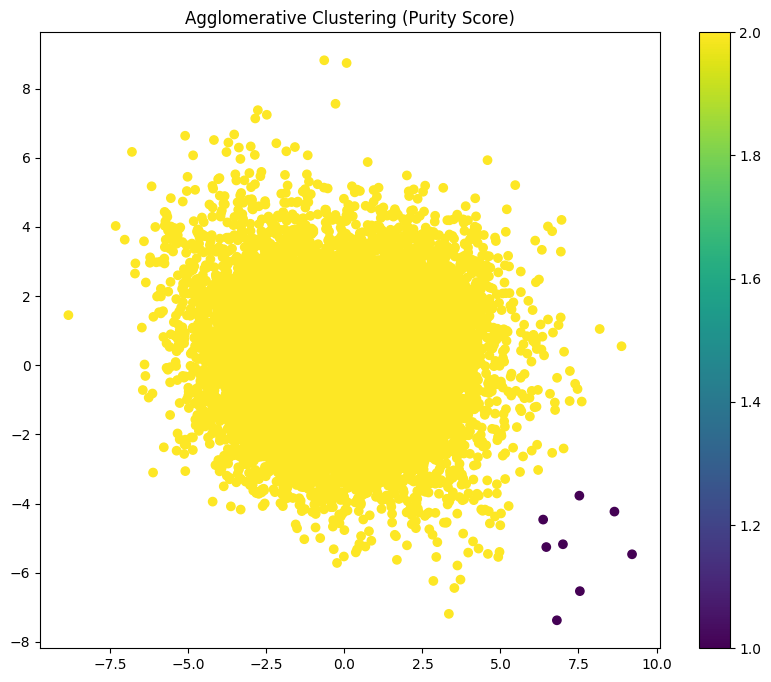

In [45]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Z = linkage(X_pca, method='average')
labels = fcluster(Z, t=2, criterion='maxclust')


def purity_score(y, y_pred):
   
    cm = confusion_matrix(y, y_pred)
    
    
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm)


purity = purity_score(y, labels)
print(f"Purity Score: {purity:.3f}")


plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.colorbar()
plt.title("Agglomerative Clustering (Purity Score)")
plt.show()


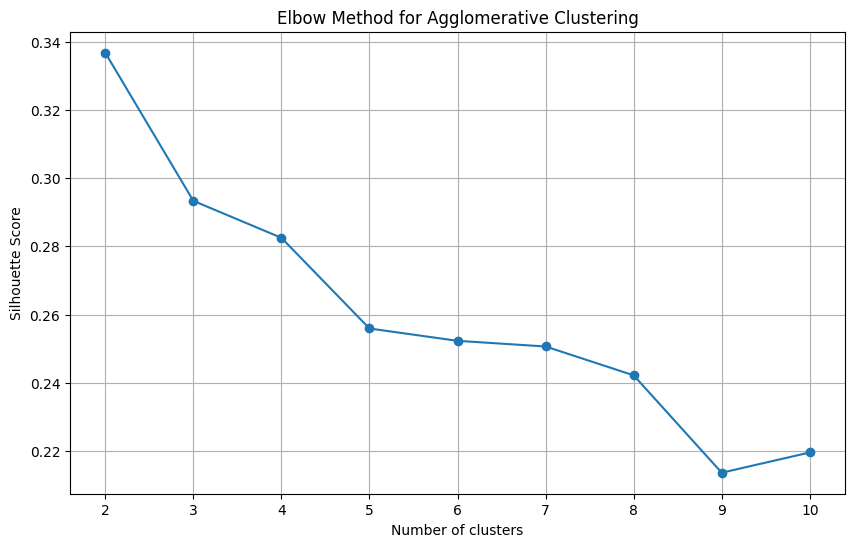

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clusterer.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plotting the Elbow (Silhouette Score)
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Elbow Method for Agglomerative Clustering")
plt.grid(True)
plt.show()
